# Bode plot for inverting OPA [gain 1] and [gain 10]

In [1]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


# Gain 1

### Read DataFrames

In [2]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_errors.csv")

### Convert to arrays of uncertainties

In [3]:
index=[28,29]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [4]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log(x), gains_arr))


### Canvas

In [5]:
canvas = ROOT.TCanvas("c1", "bode gain 1", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [6]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 1")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [7]:
#function = "1/[0]*(1-1/[0]*exp(x/[0]))"



In [8]:
function = "[1]*(1/sqrt(1+pow(x/[0],2))-1)"
fit_f = ROOT.TF1("fit1", function)
###parameter per low pass filter
fit_f.SetParName(0, "Gain")
fit_f.SetParameter(0, 2.1*10**6)
fit_f.SetParName(1, "Tau")
fit_f.SetParLimits(0,10**6,4*10**6)
fit_f.SetParLimits(1,40,500)

In [9]:
function = "-[1]/[0]*exp(x/[0])"
fit_f = ROOT.TF1("fit1", function)
###parameter per low pass filter
#fit_f.SetParName(0, "pole")
#fit_f.SetParameter(0, 10**4)
#fit_f.SetParameter(1, 10**3)

#fit_f.SetParLimits(0,10**4,4*10**4)
fit_f.SetParLimits(1,1,10**3)

In [10]:

fit_f.SetLineColor(4)

### Draw

 FCN=1762.49 FROM MIGRAD    STATUS=FAILED        102 CALLS         103 TOTAL
                     EDM=-nan    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -3.00000e-03   0.00000e+00          -nan           inf
   2  p1           5.00500e+02   7.46195e+02          -nan   0.00000e+00


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <Fit>: Abnormal termination of minimization.


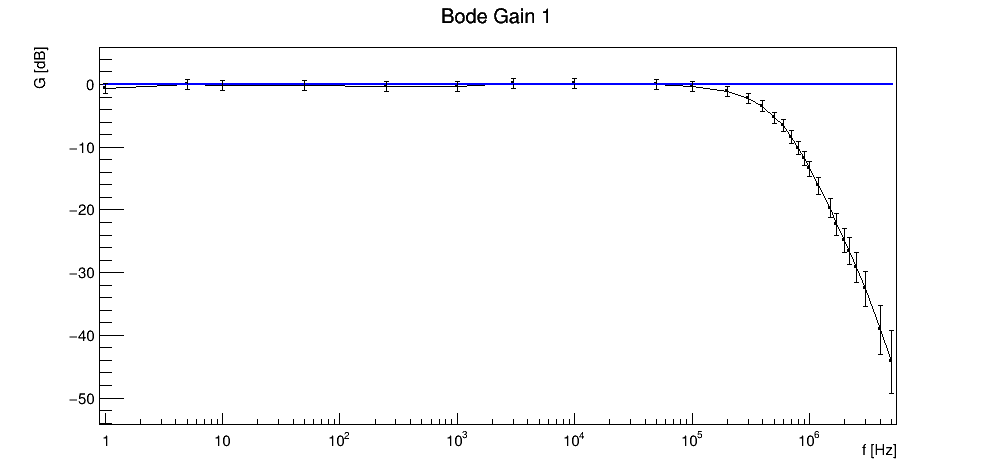

In [11]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f, "MSE")

 FCN=4459.37 FROM MINOS     STATUS=SUCCESSFUL      4 CALLS          81 TOTAL
                     EDM=7.10316e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  1st pole     8.49223e+03   2.59440e+01   2.59440e+01  -1.45279e-06


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


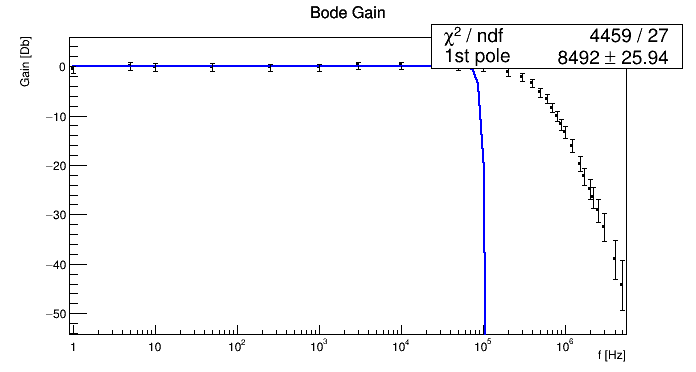

In [12]:
###fit Bode
from uncertainties import umath

canvas = ROOT.TCanvas("c1", "Bode Gain ", 700, 400)
canvas.SetLogx(True)

fit_bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)
fit_bode_graph_err.SetTitle("Bode Gain")
fit_bode_graph_err.GetXaxis().SetTitle("f [Hz]")
fit_bode_graph_err.GetYaxis().SetTitle("Gain [Db]")
fit_bode_graph_err.SetMarkerStyle(21)
fit_bode_graph_err.SetMarkerSize(0.4)

function_formula = "-1/[0]*exp(x/[0])"
fit_f = ROOT.TF1("fit1", function_formula)
fit_f.SetLineColor(4)
fit_f.SetParameter(0, 10**4)
fit_f.SetParName(0, "1st pole")
ROOT.gStyle.SetOptFit(True)

canvas.Draw()
fit_bode_graph_err.Draw("ap")
fit_bode_graph_err.Fit(fit_f, "MSE")

In [13]:
###prova scipy

In [14]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors = [0.03684758954264483,
       0.039283710065919304,
       0.03835133389809924,
       0.03914754592788334,
       0.03901186037067261,
       0.03901186037067261,
       0.03997751897888523,
       0.03997751897888523,
       0.039837001756988594,
       0.03955745430931493,
       0.03769900245103452,
       0.037049877943686936,
       0.03605169119015721,
       0.034530093684402983,
       0.03374667600547776,
       0.03278928198188431,
       0.03198910465357108,
       0.03133121936398775,
       0.03056472037572376,
       0.029797429860808376,
       0.02884568700100156,
       0.02824879639382313,
       0.028320177622922913,
       0.027958978045571105,
       0.02774748964548574,
       0.027728198334187222,
       0.02748193286061937,
       0.02756128649688445]


H(s) = TransferFunctionContinuous(
array([6.36315856e+17]),
array([1.000e+00, 2.950e+06, 2.565e+12, 6.480e+17]),
dt: None
)


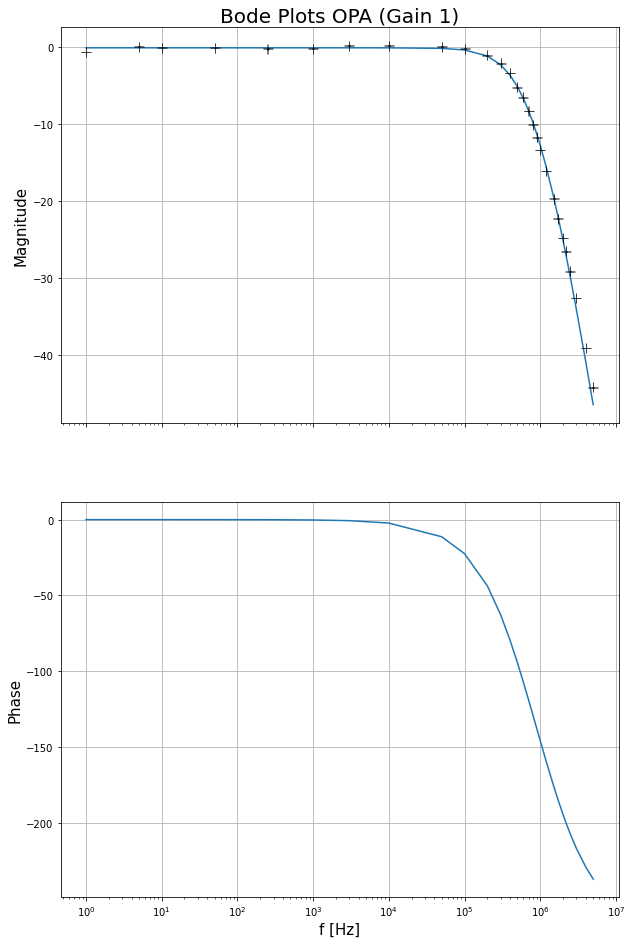

<Figure size 432x288 with 0 Axes>

In [15]:
k=11.15**17
a=4.5*10**5
b=.9*10**6
c=1.6*10**6
num = np.array([k]) #zeros(increase 20 db)
den = np.array([1,a+b+c,a*b+c*a+c*b,a*b*c]) #poles (decreases 20 db) [1,a+b+c,ab+ca+cb,abc]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f, mag, phase = H.bode(df_data_n['f'])

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag) # Magnitude Plot
plt.title('Bode Plots OPA (Gain 1)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=3,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 5)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, phase)
plt.grid()


plt.show()


plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain1(mag+phase).pdf")



In [16]:
mag-db_gain_Arr

array([ 0.5154191 , -0.15804521, -0.02152591, -0.01867189,  0.12167785,
        0.12165113, -0.2986532 , -0.30124657, -0.22895614, -0.15391149,
       -0.09052652, -0.17870179, -0.27877763,  0.07930223, -0.17053206,
        0.07199382,  0.27797215,  0.43120478,  0.58694545,  0.51311385,
        0.22368613,  0.44869543, -0.28642698, -0.59509529, -0.77851713,
       -1.51072777, -1.85423024, -2.24129551])

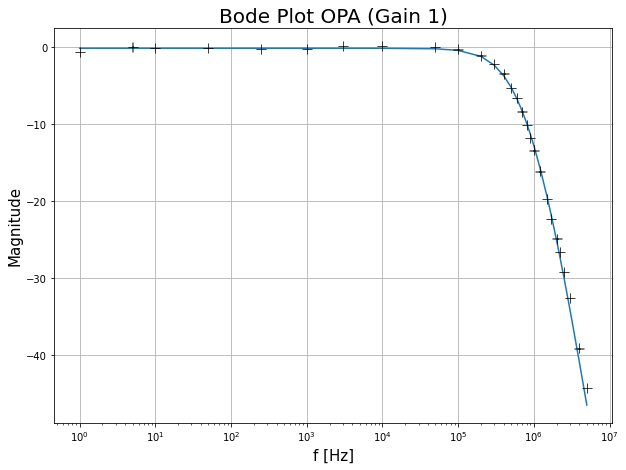

In [17]:
plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag) # Magnitude Plot
plt.title('Bode Plot OPA (Gain 1)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=3,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 5)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag).pdf")




In [18]:
###how to get bode plot

#num = np.array([1]) #zeros(increase 20 db)
#den = np.array([1/10**6,1]) #poles (decreases 20 db)
#H = signal.TransferFunction(num, den)
#print ('H(s) =', H)
#f, mag, phase = signal.bode(H)
#plt.figure()
#plt.semilogx(f, mag) # Magnitude Plot
#plt.grid()
#plt.figure()
#plt.semilogx(f, phase) # Phase plot
#plt.show()
#len(f)

# Gain 10

In [19]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_errors.csv")

### Convert to arrays of uncertainties

In [20]:
f_arr = pair_dat_err(df_data['f'], df_errors['f'])
ppch1_arr = pair_dat_err(df_data['PPch1'], df_errors['PPch1'])
ppch2_arr = pair_dat_err(df_data['PPch2'], df_errors['PPch2'])

### Calculate Gain

In [21]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log(x), gains_arr))


### Canvas

In [22]:
canvas = ROOT.TCanvas("c2", "bode gain 10", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [23]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 10")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit

In [24]:
function = "[0]/[1]*exp(x/[1])"
#function = "1/sqrt(1+pow(x/[0],2))-1"
fit_f.SetParameter(0,-40)
fit_f.SetParameter(1,10**4)
fit_f = ROOT.TF1("fit1", function)

### Draw Graph

In [25]:
#canvas.Draw()
#bode_graph_err.Draw()
#bode_graph_err.Fit(fit_f, "MSE")

In [26]:
ppch1_Arr = df_data['PPch1']
ppch2_Arr = df_data['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors =[1.1392457132682507,
 1.1837220472419332,
 1.188540648949798,
 1.188540648949798,
 1.188540648949798,
 1.1837220472419332,
 1.188540648949798,
 1.1934610377512482,
 1.359037133424585,
 1.3176413192753962,
 1.4402533545665437,
 1.3894688477333736,
 1.4518975960816864,
 1.2749938684161681,
 1.394043130412572,
 1.4978917988567928,
 1.5117277459614,
 1.6804651171340652,
 1.874538847640011,
 2.0593634245686667,
 2.154065922853802,
 2.7715251078656085,
 2.9649038395440215,
 3.785837971284672,
 6.299019607843137,
 1.2250829359246014,
 2.114725655155385,
 6.714495099740892,
 33.34952100333063]


H(s) = TransferFunctionContinuous(
array([8.34513761e+17]),
array([1.00e+00, 7.94e+05, 1.23e+11, 3.96e+15]),
dt: None
)


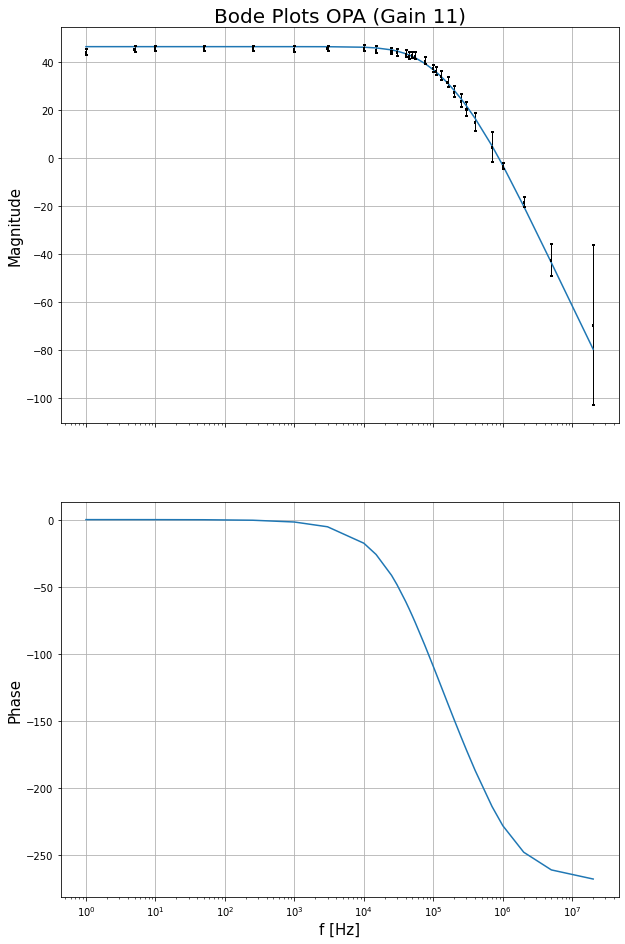

<Figure size 432x288 with 0 Axes>

In [27]:
k=9.9**18
a=4.4*10**4
b=1.5*10**5
c=6*10**5
num = np.array([k]) #zeros(increase 20 db)
den = np.array([1,a+b+c,a*b+c*a+c*b,a*b*c]) #poles (decreases 20 db) [1,a+b+c,ab+ca+cb,abc]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f, mag, phase = H.bode(df_data['f'])

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag) # Magnitude Plot
plt.title('Bode Plots OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data['f'],db_gain_Arr ,xerr = df_errors['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, phase)
plt.grid()


plt.show()

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag+phase).pdf")



In [28]:
mag-db_gain_Arr

array([  2.19128362,   0.92518284,   0.7592066 ,   0.75920072,
         0.75905382,   0.92273514,   0.73721891,   0.35265223,
         0.716083  ,   0.38428273,   0.41256265,  -0.01653944,
         0.37582727,  -0.44419623,  -0.92303854,  -1.13683699,
        -0.66561689,  -0.61497156,  -0.29801218,  -0.29393826,
         0.49751271,   0.88014545,   1.35678192,   1.55646197,
         0.57730703,   0.29695267,  -1.90508805,  -1.17059508,
       -10.27056819])

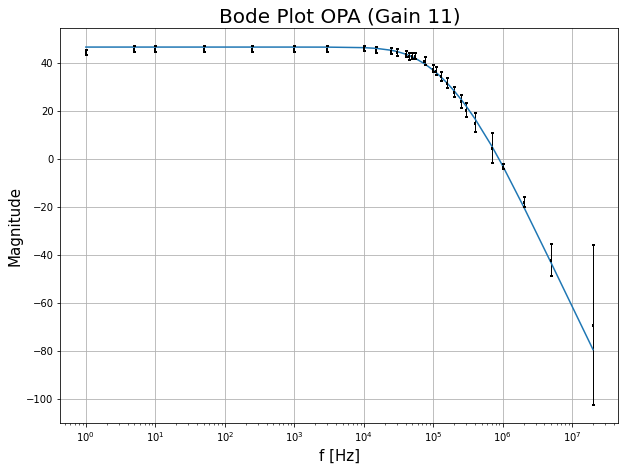

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=((10,16)))

ax1 = plt.subplot(211)
plt.semilogx(f, mag) # Magnitude Plot
plt.title('Bode Plot OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar(df_data['f'],db_gain_Arr ,xerr = df_errors['f'],yerr = db_gain_Arr_errors , fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.show()

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag).pdf")

In [ ]:
%cd /Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "bode plots inverting OPA,(3 poles transfer function both cases => mag and phase plots)"
!git push 

[Errno 2] No such file or directory: '/Electronics-2021-UNITO/'
/home/berz/Documents/ANNO_3/LAB_E/GIT/Electronics-2021-UNITO/analysis
hint: Pulling without specifying how to reconcile divergent branches is
hint: discouraged. You can squelch this message by running one of the following
hint: commands sometime before your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
Username for 'https://github.com': 